In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



df = pd.read_excel('/home/nic/Загрузки/AB_Test_Results (2).xlsx', encoding = '1251')
df.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [3]:
df.shape

(10000, 3)

In [4]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [5]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [6]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [7]:

v = df.groupby('USER_ID', as_index=False).agg({'VARIANT_NAME': pd.Series.nunique})
v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


In [8]:
v.info

<bound method DataFrame.info of       USER_ID  VARIANT_NAME
0           2             1
1           3             2
2           4             1
3           5             1
4           6             1
...       ...           ...
6319     9993             1
6320     9995             1
6321     9996             2
6322     9998             1
6323    10000             2

[6324 rows x 2 columns]>

In [9]:
more_than_one_types = v.query('VARIANT_NAME > 1')

In [10]:
df_new = df[~df.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [11]:
df_new.head()

,USER_ID,VARIANT_NAME,REVENUE
3479,2,control,0.0
7076,2,control,0.0
2406,2,control,0.0
9077,4,variant,0.0
9155,5,variant,0.0


In [12]:
control = df_new.query('VARIANT_NAME == "control"')

test = df_new.query('VARIANT_NAME == "variant"')

In [13]:
len(control)

3026

In [14]:
len(test)

3044

In [15]:
from scipy.stats import shapiro

In [16]:
alpha = 0.05

st = shapiro(df_new.REVENUE)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]));

Distribution is not normal



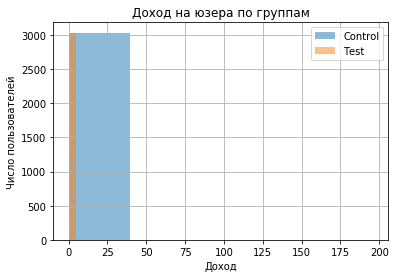

In [17]:
control.REVENUE.hist(bins = 5, alpha =0.5, label='Control')
test.REVENUE.hist(bins = 5, alpha =0.5, label='Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

In [18]:
import numpy as np
from scipy import stats
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.403762252371675, pvalue=0.1604844017690842)

По имеющимся данным нет статистической разницы между тестовой и контрольной группой. 



In [19]:
C_mean = control.REVENUE.values.mean()

T_mean = test.REVENUE.values.mean()

C_std = control.REVENUE.values.std()

T_std = test.REVENUE.values.std()

n =  len(control.REVENUE.values)

S = np.sqrt((T_std**2 + C_std **2)/ 2)

effect =float((T_mean - C_mean)/ S) 

In [23]:
from statsmodels.stats.power import TTestIndPower

alpha = 0.05

result = TTestIndPower().solve_power(effect, power=None,
nobs1=n, ratio=1.0, alpha=alpha)

print(result)

print(10000 * 0.8 /result) 

0.28936707257547545
27646.54571370889


По данным мощностного анализа количества наблюдений для корректных выводов не достаточно. Рекомендуется продолжить A/B тестирование до набора общего количества наблюдений 27647 (текушее 10000). 